### 01. Importing Libraries and Datframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # To perform kmeans algo
from sklearn.preprocessing import StandardScaler
import pylab as pl #convenience module of matplotlib

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Importing DF

path = r'C:\Users\William Inglish\Project 6 Liquor Sales'

df_sales = pd.read_csv(os.path.join(path,'02 Data', 'Prepared', 'Sales_Wrangled.csv'), index_col = 0)

### 02. Data Wrangling

In [4]:
df_sales.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county_name,...,item_number,item_description,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [5]:
df_sales.shape

(2805307, 24)

In [6]:
# Removing all outliers from the bottles_sold field

df_sales_wrangled = df_sales[df_sales['bottles_sold'] <= 25]
df_sales_wrangled.shape

(2651460, 24)

In [7]:
# Removing outliers from package_size

df_sales_wrangled = df_sales_wrangled[df_sales_wrangled['package_size'] <= 20]
df_sales_wrangled.shape

(2380841, 24)

In [8]:
# Removing outliers from package_size

df_sales_wrangled = df_sales_wrangled[df_sales_wrangled['volume_sold_liters'] <= 24]
df_sales_wrangled.shape

(2360433, 24)

In [9]:
# Removing outliers from package_size

df_sales_wrangled = df_sales_wrangled[df_sales_wrangled['sale_dollars'] <= 300]
df_sales_wrangled.shape

(2247851, 24)

In [10]:
# Removing outliers from package_size

df_sales_wrangled = df_sales_wrangled[df_sales_wrangled['volume_sold_gallons'] <= 5.3]
df_sales_wrangled.shape

(2193249, 24)

In [11]:
# Removing outliers from package_size

df_sales_wrangled = df_sales_wrangled[df_sales_wrangled['state_bottle_cost'] <= 22]
df_sales_wrangled.shape

(2012173, 24)

In [12]:
# Removing all categorical/Qualitative data for k-means

df_sales_kmeans = df_sales_wrangled[['package_size','bottle_volume_ml','state_bottle_cost','state_bottle_retail','bottles_sold','sale_dollars','volume_sold_liters','volume_sold_gallons']]
df_sales_kmeans.shape

(2012173, 8)

In [13]:
df_sales_kmeans.isnull().sum()

package_size           0
bottle_volume_ml       0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
dtype: int64

### 03. Standardizing Dataframe

In [14]:
# Defining standard scaler

scaler = StandardScaler()

In [15]:
# Transforms the data

df_stand = scaler.fit_transform(df_sales_kmeans)

### 04. Elbow Technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
# Creating a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_stand).score(df_stand) for i in range(len(kmeans))]
score

C:\Users\William Inglish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\William Inglish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\William Inglish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\William Inglish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\William

[-16097384.000000479,
 -10495354.649881879,
 -7637083.20902901,
 -5819871.255956798,
 -4753802.887967077,
 -4241591.666083742,
 -3754789.3840513,
 -3338412.3304071845,
 -2997548.8303551176]

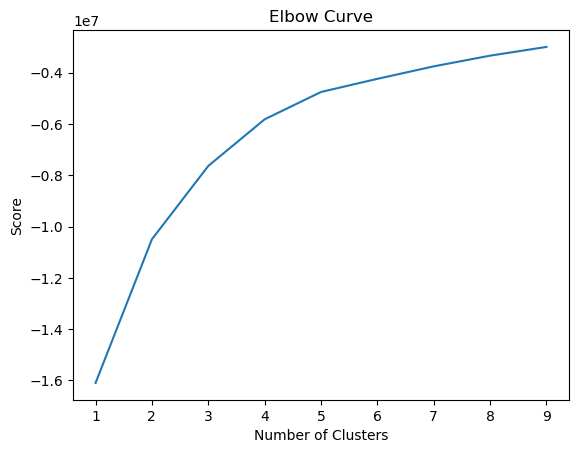

In [18]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

It looks like the curve is flattening out around 5 clusters so we will use that to apply into our algo. We could also choose 6 to be safer but it loks like the slope flattens out before hand.

### 05. K-Means

In [20]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [21]:
# Fitting the k-means object to the data.

kmeans.fit(df_sales_kmeans)

C:\Users\William Inglish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [22]:
# Creating cluster column to view clusters for every record

df_sales_kmeans['clusters'] = kmeans.fit_predict(df_sales_kmeans)

C:\Users\William Inglish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\William Inglish\AppData\Local\Temp\ipykernel_11864\754367150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_kmeans['clusters'] = kmeans.fit_predict(df_sales_kmeans)


In [23]:
# Looking at number of observations in each cluster

df_sales_kmeans['clusters'].value_counts()

0    1073563
1     392903
2     271991
3     194430
4      79286
Name: clusters, dtype: int64

In [24]:
df_sales_kmeans.head()

,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,clusters
1,12,750,11.50,17.25,4,69.00,3.0,0.79,0
2,6,1750,14.75,22.13,6,132.78,10.5,2.77,1
3,12,750,3.31,4.97,12,59.64,9.0,2.37,0
4,12,750,20.99,31.49,2,62.98,1.5,0.39,0
5,6,1750,13.50,20.25,6,121.50,10.5,2.77,1



### 06. Visualization

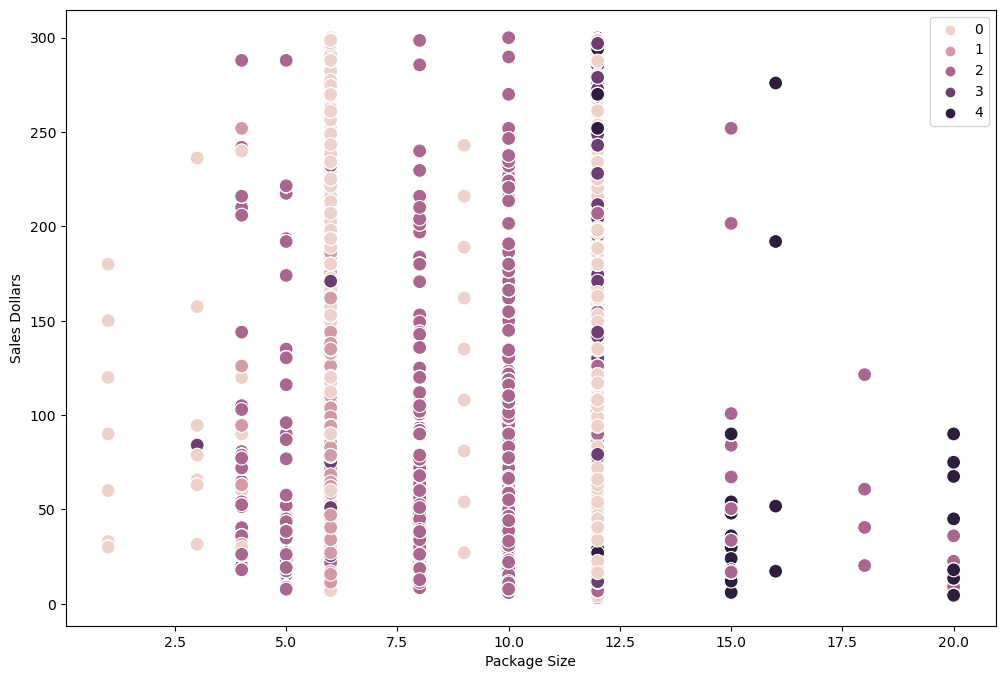

In [25]:
# Plotting the clusters for the "Package Size" and "Sales Dollars" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_kmeans['package_size'], y=df_sales_kmeans['sale_dollars'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Package Size') # Label x-axis.
plt.ylabel('Sales Dollars') # Label y-axis.
plt.show()

No relevant connections from package size and sales in dollars. The only notable result is that cluster 4 only appears after the packaging size is 15 or greater.

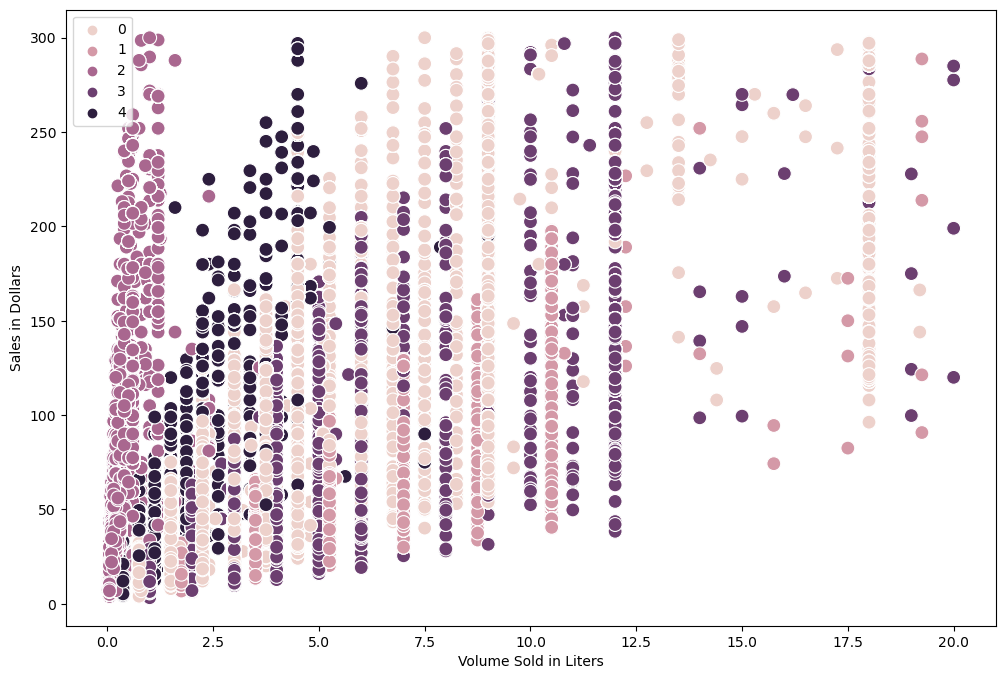

In [28]:
# Plotting the clusters for the "Volume Sold in Liters" and "Sales in Dollars" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_kmeans['volume_sold_liters'], y=df_sales_kmeans['sale_dollars'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Volume Sold in Liters')
plt.ylabel('Sales in Dollars')
plt.show()

We can see that clusters 3 and 4 are primarily between 0 and 5 Liters sold. However, the sales size spans to tall from 0 to 300. But we can tell that around 270,000 purchases primarily were between 0 and 1.4 Liters.

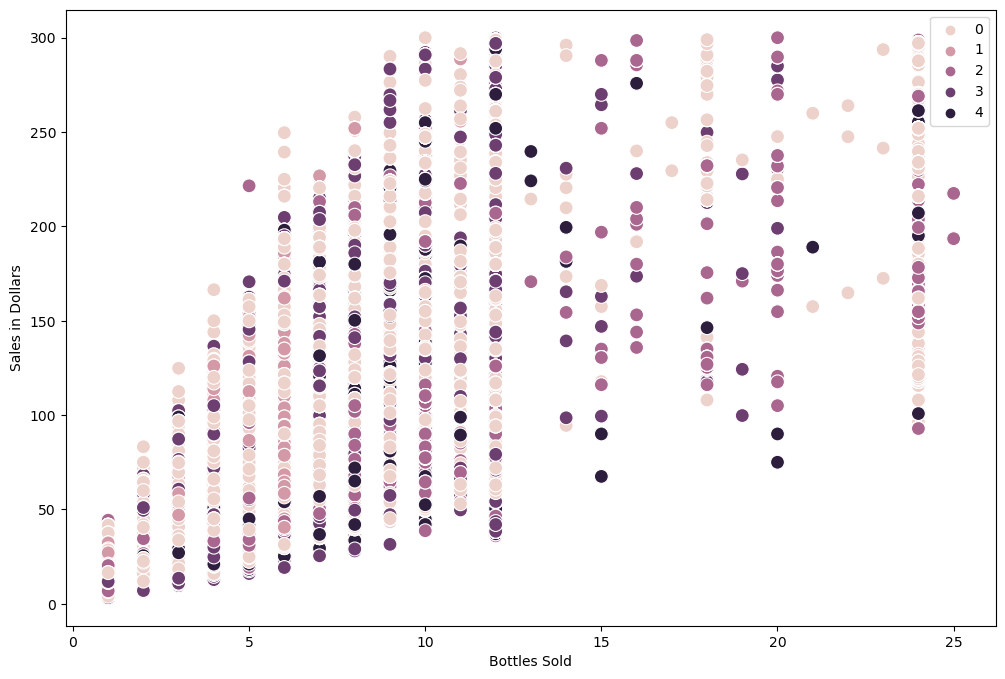

In [31]:
# Plotting the clusters for the "Bottles sold" and "Sales in Dollars" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_kmeans['bottles_sold'], y=df_sales_kmeans['sale_dollars'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Bottles Sold')
plt.ylabel('Sales in Dollars')
plt.show()

Nothing to investigate as the clusters are to randomized.

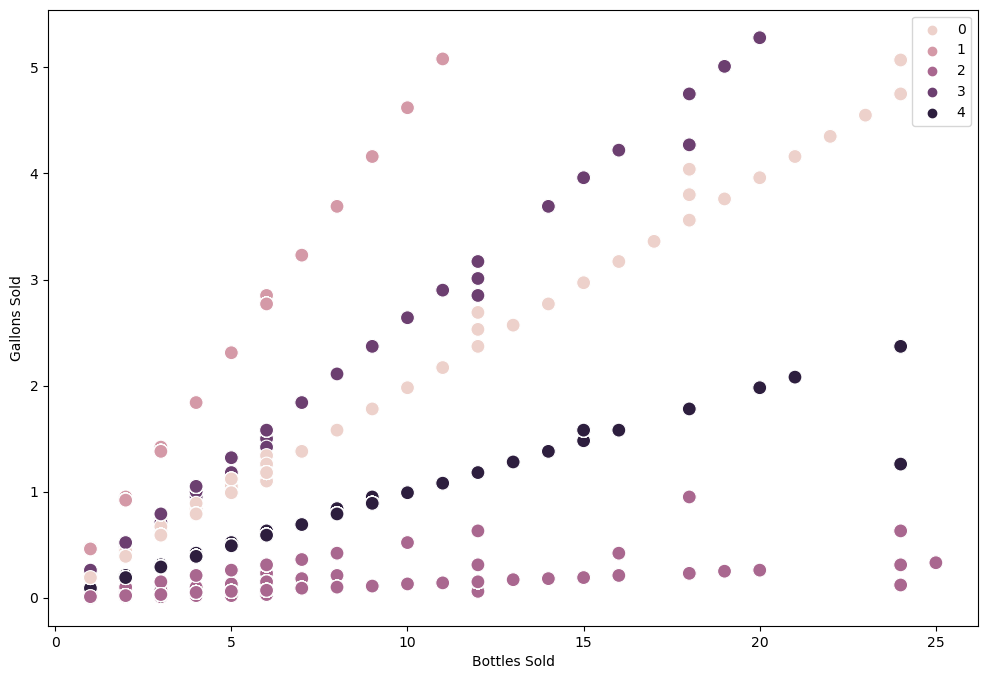

In [38]:
# Plotting the clusters for the "Bottles Sold" and "Volume Sold in Gallons" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_kmeans['bottles_sold'], y=df_sales_kmeans['volume_sold_gallons'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Bottles Sold')
plt.ylabel('Gallons Sold')
plt.show()

Not sure how to judge this graph correctly since it is giving me a linear slope instead of groups. The only small grouping is cluster 2 around 5 bottles sold.

### 07. Insights and Descriptive Stats

In [33]:
# Setting clusters with names to look at descriptive stats
df_sales_kmeans.loc[df_sales_kmeans['clusters'] == 0, 'cluster'] = 'light pink'
df_sales_kmeans.loc[df_sales_kmeans['clusters'] == 1, 'cluster'] = 'pink'
df_sales_kmeans.loc[df_sales_kmeans['clusters'] == 2, 'cluster'] = 'purple'
df_sales_kmeans.loc[df_sales_kmeans['clusters'] == 3, 'cluster'] = 'dark purple'
df_sales_kmeans.loc[df_sales_kmeans['clusters'] == 4, 'cluster'] = 'black'

C:\Users\William Inglish\AppData\Local\Temp\ipykernel_11864\3413204566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_kmeans.loc[df_sales_kmeans['clusters'] == 0, 'cluster'] = 'light pink'


In [35]:
# Verifying

df_sales_kmeans.head()

,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,clusters,cluster
1,12,750,11.50,17.25,4,69.00,3.0,0.79,0,light pink
2,6,1750,14.75,22.13,6,132.78,10.5,2.77,1,pink
3,12,750,3.31,4.97,12,59.64,9.0,2.37,0,light pink
4,12,750,20.99,31.49,2,62.98,1.5,0.39,0,light pink
5,6,1750,13.50,20.25,6,121.50,10.5,2.77,1,pink


In [36]:
# Descriptive analysis using cluster column to group by
df_sales_kmeans.groupby('cluster').agg({'package_size':['mean', 'median'], 
                         'bottle_volume_ml':['mean', 'median'], 
                         'state_bottle_cost':['mean', 'median'],
                         'state_bottle_retail':['mean', 'median'],
                         'bottles_sold':['mean', 'median'],
                         'sale_dollars':['mean', 'median'],
                         'volume_sold_liters':['mean', 'median'],
                         'volume_sold_gallons':['mean', 'median'] })

package_size        bottle_volume_ml         state_bottle_cost  \
                    mean median             mean  median              mean   
cluster                                                                      
black          11.999268   12.0       374.499912   375.0          8.554062   
dark purple    11.830628   12.0       999.630715  1000.0          9.754730   
light pink     10.940612   12.0       750.118624   750.0         10.349981   
pink            5.999410    6.0      1750.014762  1750.0         11.090553   
purple         10.160046   12.0        53.854466    50.0          6.904371   

                   state_bottle_retail        bottles_sold         \
            median                mean median         mean median   
cluster                                                             
black         8.00           12.832511  12.00     8.327498   12.0   
dark purple   9.25           14.634691  13.88     8.136985   12.0   
light pink    9.99           15.525552  14.99     7.216451    6.0   
pink         10.45           16.635497  15.68     5.356897    6.0   
purple        5.54           10.361231   8.31     4.837667    2.0   

            sale_dollars        volume_sold_liters        volume_sold_gallons  \
                    mean median               mean median                mean   
cluster                                                                         
black         106.780121  97.56           3.111420    4.5            0.814501   
dark purple   112.914108  88.92           8.134858   12.0            2.146689   
light pink    103.567105  89.94           5.413058    4.5            1.423258   
pink           88.077895  78.66           9.374654   10.5            2.472536   
purple         46.111376  25.28           0.270180    0.1            0.065877   

                    
            median  
cluster             
black         1.18  
dark purple   3.17  
light pink    1.18  
pink          2.77  
purple        0.02

### **Looking at the results above, we can see that**,
    
    1. All of the clusters except pink have a package size around 12 bottles, however the pink cluster averages around 6. This might have a correlation with the bottles volume in mL, as it on average has double the size of the bottle than any other cluster, 
    
    2. That the purple cluster, which is around half of the purchases, has an average of 7 dollars rounded up which is what Iowa pays to manufacture each bottle of liquor ordered. The rest of the clusters are between 8 and 11 dollars for the cost of each bottle manufactured. However, this comes at a cost of a lower sales dollars on average, while the other cluster are averaging around double or more than the purple cluster.
    
    3. The 2nd biggest cluster, pink has a higher average of volume of liquor sold in Liters, however, it has a lower average for sales dollars than all but the purple cluster. Since sales dolllars means (Bottles_ordered X state_bottle_retail), This must mean that on average, 392,000 purchases have a bigger bottle volume than any other cluster.
    

### **These results can be useful to**:

- Visulize the top products sold under 2.5 volumes sold from the store.
- Look further into the smaller volume of liquor products to verify the small amount of sales dollars and bottles sold.